# Facial expressions recognition data preparation

In [22]:
# importing the general dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings

warnings.filterwarnings('ignore')

In [23]:
# Lets check what we have in our dataset

dataset_root = 'datasets/faces_yolo/'

for root, directories, files in os.walk(dataset_root):
    # Do something with the current directory path 'root'
    print("Current directory:", root)
    
    # Do something with the list of subdirectories 'directories'
    print("Subdirectories:", directories)
    
    # Do something with the list of files 'files'
    print("Files:", len(files))

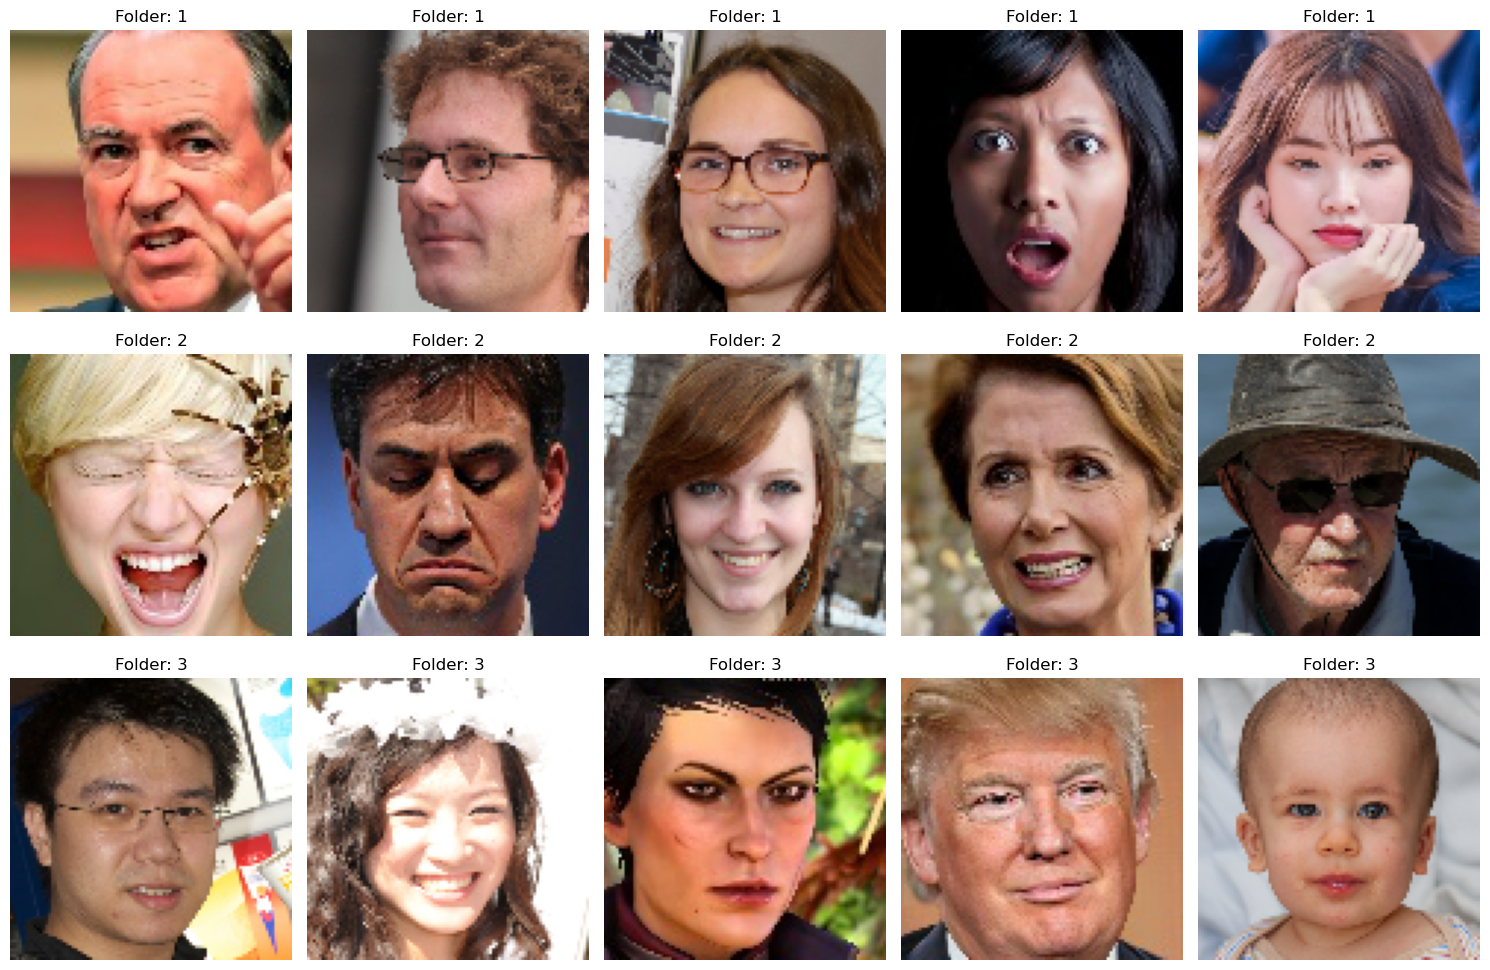

In [24]:
# Lets observe some images from three folders

# Define the paths to the image folders
image_folders = [
    "./datasets/faces_yolo/valid/images",
    "./datasets/faces_yolo/test/images",
    "./datasets/faces_yolo/train/images"
]

# Define the number of images you want to display from each folder
num_images_per_folder = 5

# Create a subplot grid
fig, axes = plt.subplots(len(image_folders), num_images_per_folder, figsize=(15, 10))

# Loop through each image folder
for i, folder in enumerate(image_folders):
    image_files = os.listdir(folder)[:num_images_per_folder]  # Get the list of image files
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(folder, image_file)
        try:
            # Open and display the image
            img = plt.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            # show labels
            axes[i, j].set_title(f"Folder: {i+1}")
            
        except Exception as e:
            print(f"Error opening image: {image_path}")

# Adjust layout
plt.tight_layout()
plt.show()

./datasets/faces_yolo/train/labels/image0023299.txt
./datasets/faces_yolo/train/images/image0023299.jpg


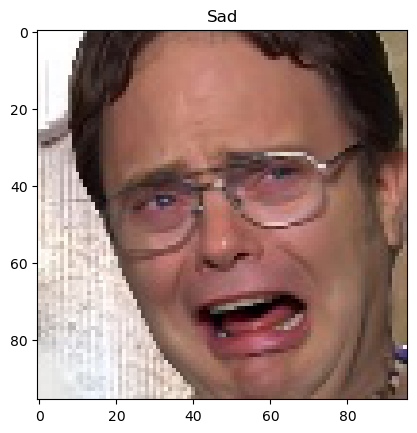

In [34]:
# Lets observe an individual image with its corresponding label
labels_map = {
    '0' : 'Anger',
    '1' : 'Contempt',
    '2' : 'Disgust',
    '3' : 'Fear',
    '4' : 'Happy',
    '5' : 'Neutral',
    '6' : 'Sad',
    '7' : 'Surprise'
}

random_number = 777
train_images_path = './datasets/faces_yolo/train/images'
random_image_path = os.path.join(train_images_path, os.listdir(train_images_path)[random_number])
random_image = plt.imread(random_image_path)

train_labels_path = './datasets/faces_yolo/train/labels'
random_label_file = random_image_path.split('/')[-1].split('.')[0] + '.txt'
random_label_path = os.path.join(train_labels_path, random_label_file)

with open(random_label_path, 'r') as file:
    # first character is the label
    first_character = file.read(1)
image_class = labels_map[first_character]

print(random_label_path)
print(random_image_path)

plt.imshow(random_image)
plt.title(f'{image_class}')
plt.show()

In [8]:
# Class frequencies
class_frequencies = np.array([])

# Define the paths to the image folders
label_folders = [
    "./datasets/faces_yolo/valid/labels",
    "./datasets/faces_yolo/test/labels",
    "./datasets/faces_yolo/train/labels"
]

# Iterate over each label directory (valid, test, train)
for label_dir in label_folders:
    
    # Iterate over each .txt file in the labels directory
    for file_name in os.listdir(label_dir):
        if file_name.endswith('.txt'):
            file_path = os.path.join(label_dir, file_name)
            
            # Read the first character of the file
            with open(file_path, 'r') as file:
                first_character = file.read(1)
        
        class_frequencies = np.append(class_frequencies, first_character)

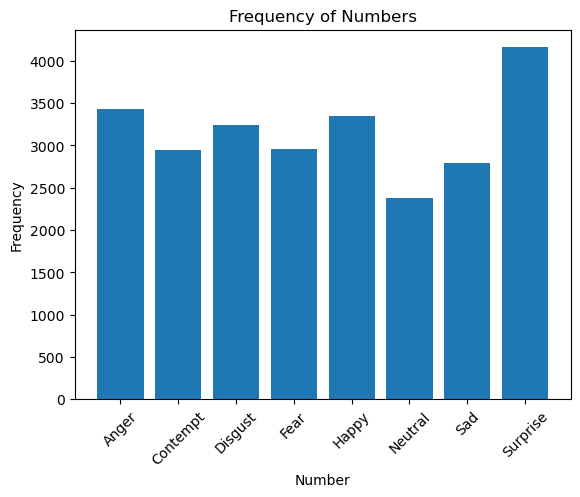

In [9]:
unique, counts = np.unique(class_frequencies, return_counts=True)
unique_mapped = [labels_map[x] for x in unique]

# Create the bar plot
plt.bar(unique_mapped, counts)

# Add labels and title
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [10]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

!yolo checks

Ultralytics YOLOv8.1.42 🚀 Python-3.11.5 torch-2.2.2 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 853.9/926.4 GB disk)

OS                  macOS-14.0-arm64-arm-64bit
Environment         Darwin
Python              3.11.5
Install             pip
RAM                 16.00 GB
CPU                 Apple M1
CUDA                None

matplotlib          ✅ 3.7.2>=3.3.0
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 10.0.1>=7.1.2
pyyaml              ✅ 6.0>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.1>=1.4.1
torch               ✅ 2.2.2>=1.8.0
torchvision         ✅ 0.17.2>=0.9.0
tqdm                ✅ 4.65.0>=4.64.0
psutil              ✅ 5.9.0
py-cpuinfo          ✅ 8.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0


In [11]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [17]:
!ls faces_yolo

data.yaml test      train     valid


## Train the model

In [29]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data=datasets/faces_yolo/data.yaml \
epochs=5 \
imgsz=640

In [33]:
!yolo task=detect \
mode=val \
model=./runs/detect/train7/weights/best.pt \
data=./datasets/faces_yolo/data.yaml